# Decision Trees

In [34]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree

# Mass Shootings

In [35]:
# reading the dataset
df = pd.read_csv("gunviolencearchive_mass_shooting_all_years.csv")

# cleaning up a little bit
df = df.fillna(0)
df['Target'] = (df['Victims Killed'] > 0).astype(int)
df.head()

features = ['Victims Injured', 'Suspects Killed', 'Suspects Injured', 'Suspects Arrested']
X = df[features]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 


In [36]:
# No. of instance with 1 in target variable for training set
display(y_train.value_counts()) # roughly about 44.4% of the data has drought condition

# No. of instance with 1 in target variable for test set
display(y_test.value_counts()) # roughly about 44.4% of the data has drought condition

Target
1    1911
0    1717
Name: count, dtype: int64

Target
1    850
0    705
Name: count, dtype: int64

In [37]:
# display the data after splitting

# Training set
display(pd.DataFrame(X_train).head())
display(pd.DataFrame(y_train).head())

# Test set
display(pd.DataFrame(X_test).head())
display(pd.DataFrame(y_test).head())

,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
620,3,0,0,4
621,8,0,0,0
3144,2,0,0,1
2770,4,0,0,0
2201,3,0,0,0


,Target
620,1
621,0
3144,1
2770,0
2201,1


,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
4754,9,0,0,0
5161,5,0,0,0
2027,4,0,0,0
405,4,0,0,0
2470,4,0,0,5


,Target
4754,0
5161,0
2027,0
405,0
2470,0


In [38]:
# Scaling the features
# Feature scaling is performed to ensure that the model is not biased towards the features with higher magnitude

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [39]:
# Displaying the scaled training set

display(pd.DataFrame(X_train).head())

,0,1,2,3
0,-0.158232,-0.242881,-0.172545,3.082706
1,0.500856,-0.242881,-0.172545,-0.543184
2,-0.290049,-0.242881,-0.172545,0.363289
3,-0.026414,-0.242881,-0.172545,-0.543184
4,-0.158232,-0.242881,-0.172545,-0.543184


In [40]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

preds = classifier.predict(X_test)
preds

array([1, 0, 0, ..., 0, 1, 1], shape=(1555,))

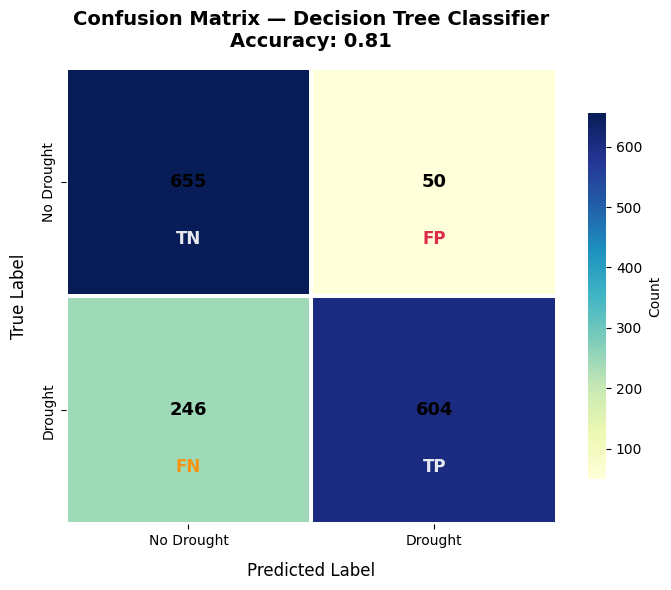

In [41]:
# Generating the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix and accuracy
cm = confusion_matrix(y_test, preds)
acc = accuracy_score(y_test, preds)

# Class labels
labels = ["No Drought", "Drought"]

# Plot setup
plt.figure(figsize=(7,6))
ax = sns.heatmap(cm, annot=True, fmt='d',
                 cmap='YlGnBu',
                 linewidths=1.5, linecolor='white',
                 xticklabels=labels, yticklabels=labels,
                 cbar_kws={'shrink':0.8, 'label':'Count'},
                 annot_kws={'size':13, 'weight':'bold', 'color':'black'})

plt.title(f"Confusion Matrix — Decision Tree Classifier\nAccuracy: {acc:.2f}",
          fontsize=14, weight='bold', pad=15)
plt.xlabel("Predicted Label", fontsize=12, labelpad=10)
plt.ylabel("True Label", fontsize=12, labelpad=10)

# Label coordinates (slightly below numeric counts)
offset_y = 0.25  # small downward shift from center

# Overlay TN / FP / FN / TP *below* the numbers
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == 0 and j == 0:
            label, color = "TN", "white"
        elif i == 0 and j == 1:
            label, color = "FP", "crimson"
        elif i == 1 and j == 0:
            label, color = "FN", "darkorange"
        else:
            label, color = "TP", "white"

        ax.text(j + 0.5, i + 0.5 + offset_y, label,
                color=color, fontsize=12, weight='bold',
                ha='center', va='center', alpha=0.9)

plt.tight_layout()
plt.show()

In [42]:
# Accuracy, F1 Score and Recall Score

accuracy = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds)
recall = recall_score(y_test, preds)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Recall Score: {recall:.2f}')

Accuracy: 0.81
F1 Score: 0.80
Recall Score: 0.71


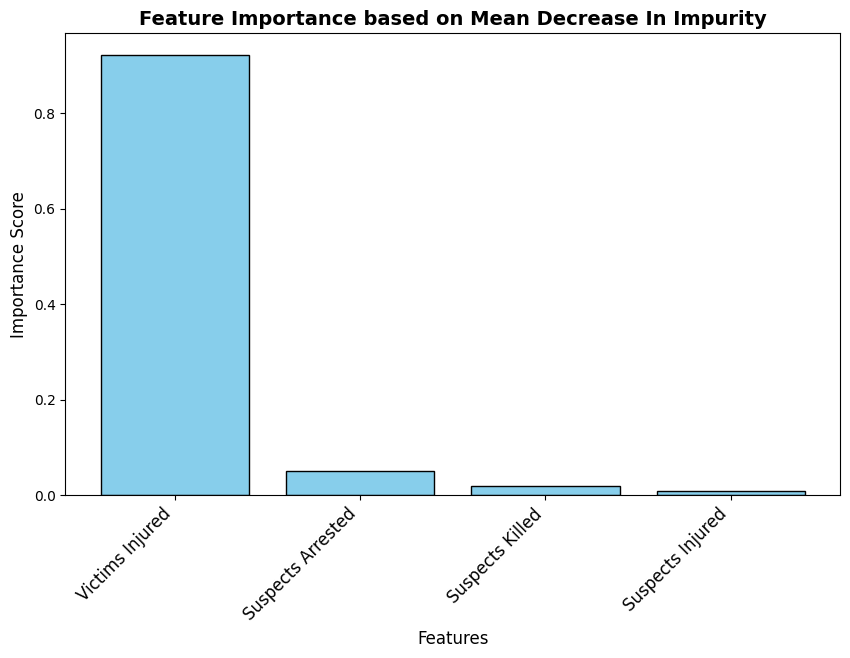

In [43]:
# Visualize Feature Importance

importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance based on Mean Decrease In Impurity", fontsize = 14, weight = 'bold')
plt.bar(range(X_train.shape[1]), importances[indices], align = 'center', color = 'skyblue', edgecolor = 'black')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation = 45, ha = 'right', fontsize = 12)
plt.xlabel("Features", fontsize = 12)
plt.ylabel("Importance Score", fontsize = 12)
plt.show()

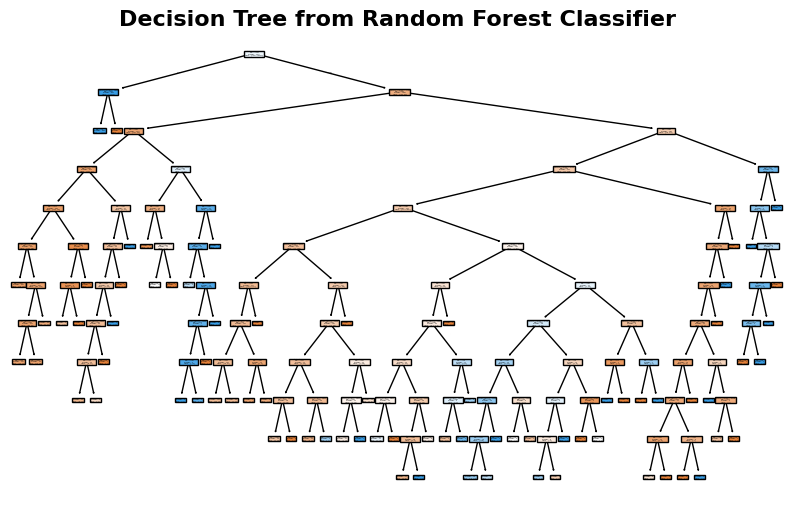

In [44]:
# Visualizing the Decision Tree for a Random Forest Classifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10,6))
plot_tree(classifier.estimators_[0], feature_names = features, filled = True)
plt.title("Decision Tree from Random Forest Classifier", fontsize=16, weight='bold')
plt.show()

## School Shootings

In [45]:
# reading the dataset
df = pd.read_csv("gunviolencearchive_school_shooting.csv")

# cleaning up a little bit
df = df.fillna(0)
df['Target'] = (df['Victims Killed'] > 0).astype(int)
df.head()

features = ['Victims Injured', 'Suspects Killed', 'Suspects Injured', 'Suspects Arrested']
X = df[features]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 


In [46]:
# No. of instance with 1 in target variable for training set
display(y_train.value_counts())

# No. of instance with 1 in target variable for test set
display(y_test.value_counts())

Target
0    5591
1     189
Name: count, dtype: int64

Target
0    2391
1      87
Name: count, dtype: int64

In [48]:
# display the data after splitting

# Training set
display(pd.DataFrame(X_train).head())
display(pd.DataFrame(y_train).head())

# Test set
display(pd.DataFrame(X_test).head())
display(pd.DataFrame(y_test).head())

,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
4874,0,0,0,0
4661,0,0,0,0
5824,0,0,0,0
5492,0,0,0,1
3501,1,0,0,1


,Target
4874,0
4661,0
5824,0
5492,0
3501,0


,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
3490,0,0,0,1
1831,0,0,0,1
635,0,0,0,1
7821,2,0,0,1
5135,0,0,0,1


,Target
3490,0
1831,0
635,0
7821,0
5135,0


In [49]:
# Scaling the features
# Feature scaling is performed to ensure that the model is not biased towards the features with higher magnitude

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [50]:
# Displaying the scaled training set

display(pd.DataFrame(X_train).head())

,0,1,2,3
0,-0.192369,-0.102472,-0.093399,-1.183315
1,-0.192369,-0.102472,-0.093399,-1.183315
2,-0.192369,-0.102472,-0.093399,-1.183315
3,-0.192369,-0.102472,-0.093399,0.235681
4,1.322475,-0.102472,-0.093399,0.235681


In [51]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

preds = classifier.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], shape=(2478,))

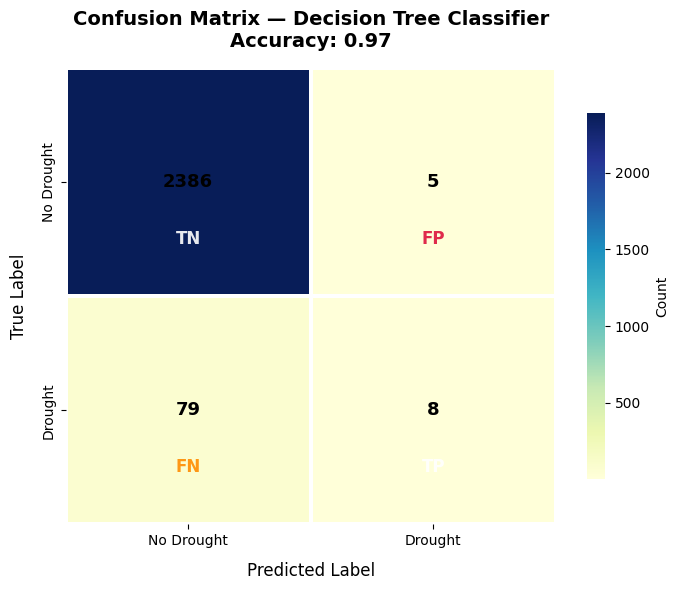

In [52]:
# Generating the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix and accuracy
cm = confusion_matrix(y_test, preds)
acc = accuracy_score(y_test, preds)

# Class labels
labels = ["No Drought", "Drought"]

# Plot setup
plt.figure(figsize=(7,6))
ax = sns.heatmap(cm, annot=True, fmt='d',
                 cmap='YlGnBu',
                 linewidths=1.5, linecolor='white',
                 xticklabels=labels, yticklabels=labels,
                 cbar_kws={'shrink':0.8, 'label':'Count'},
                 annot_kws={'size':13, 'weight':'bold', 'color':'black'})

plt.title(f"Confusion Matrix — Decision Tree Classifier\nAccuracy: {acc:.2f}",
          fontsize=14, weight='bold', pad=15)
plt.xlabel("Predicted Label", fontsize=12, labelpad=10)
plt.ylabel("True Label", fontsize=12, labelpad=10)

# Label coordinates (slightly below numeric counts)
offset_y = 0.25  # small downward shift from center

# Overlay TN / FP / FN / TP *below* the numbers
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == 0 and j == 0:
            label, color = "TN", "white"
        elif i == 0 and j == 1:
            label, color = "FP", "crimson"
        elif i == 1 and j == 0:
            label, color = "FN", "darkorange"
        else:
            label, color = "TP", "white"

        ax.text(j + 0.5, i + 0.5 + offset_y, label,
                color=color, fontsize=12, weight='bold',
                ha='center', va='center', alpha=0.9)

plt.tight_layout()
plt.show()

In [53]:
# Accuracy, F1 Score and Recall Score

accuracy = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds)
recall = recall_score(y_test, preds)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Recall Score: {recall:.2f}')

Accuracy: 0.97
F1 Score: 0.16
Recall Score: 0.09


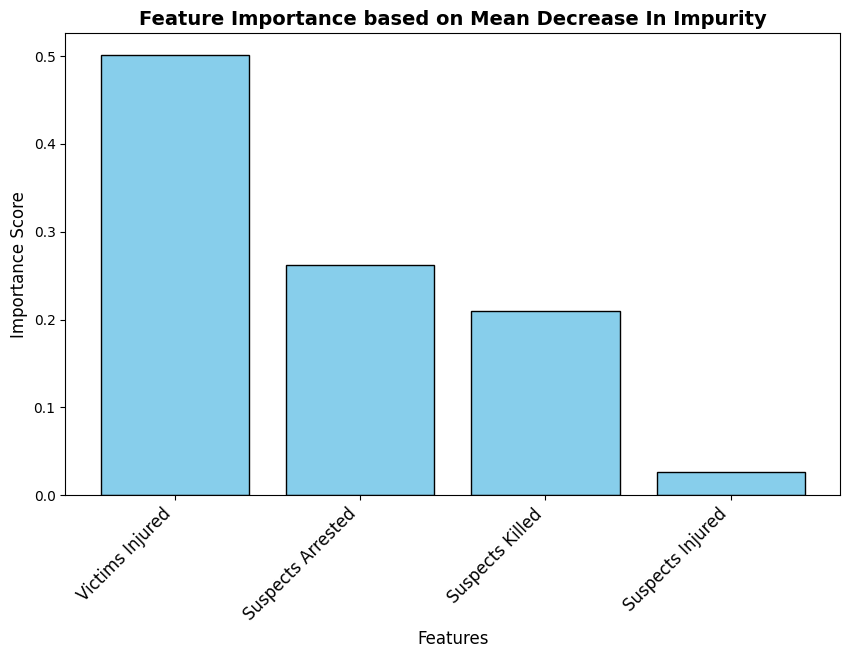

In [54]:
# Visualize Feature Importance

importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance based on Mean Decrease In Impurity", fontsize = 14, weight = 'bold')
plt.bar(range(X_train.shape[1]), importances[indices], align = 'center', color = 'skyblue', edgecolor = 'black')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation = 45, ha = 'right', fontsize = 12)
plt.xlabel("Features", fontsize = 12)
plt.ylabel("Importance Score", fontsize = 12)
plt.show()

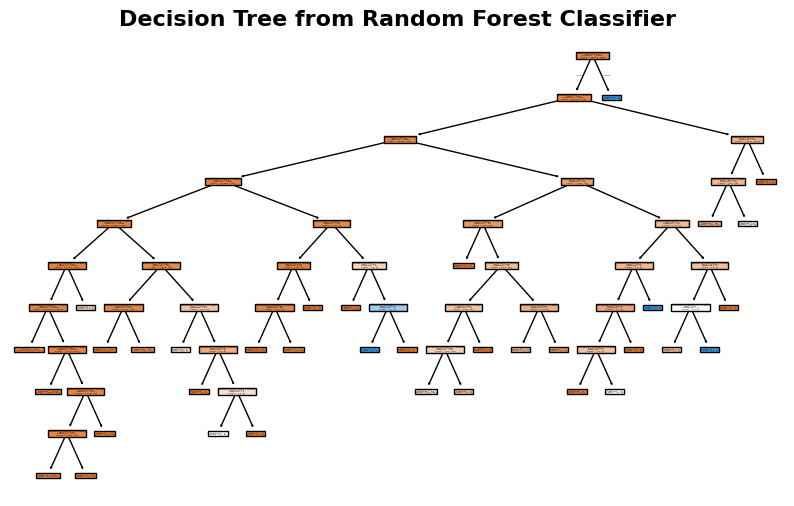

In [55]:
# Visualizing the Decision Tree for a Random Forest Classifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10,6))
plot_tree(classifier.estimators_[0], feature_names = features, filled = True)
plt.title("Decision Tree from Random Forest Classifier", fontsize=16, weight='bold')
plt.show()

## Police Involved Shootings

In [56]:
# reading the dataset
df = pd.read_csv("gunviolencearchive_officer_involved_shooting.csv")

# cleaning up a little bit
df = df.fillna(0)
df['Target'] = (df['Victims Killed'] > 0).astype(int)
df.head()

features = ['Victims Injured', 'Suspects Killed', 'Suspects Injured', 'Suspects Arrested']
X = df[features]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 


In [57]:
# No. of instance with 1 in target variable for training set
display(y_train.value_counts())

# No. of instance with 1 in target variable for test set
display(y_test.value_counts())

Target
0    1833
1     209
Name: count, dtype: int64

Target
0    780
1     96
Name: count, dtype: int64

In [58]:
# display the data after splitting

# Training set
display(pd.DataFrame(X_train).head())
display(pd.DataFrame(y_train).head())

# Test set
display(pd.DataFrame(X_test).head())
display(pd.DataFrame(y_test).head())

,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
1,1,0,1,1
384,1,0,0,1
530,2,1,0,0
588,1,1,0,0
1032,2,0,0,0


,Target
1,0
384,0
530,0
588,0
1032,0


,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
380,1,1,0,0
2598,1,1,0,0
1774,1,0,0,0
841,1,1,0,0
22,1,0,0,1


,Target
380,0
2598,0
1774,0
841,0
22,0


In [59]:
# Scaling the features
# Feature scaling is performed to ensure that the model is not biased towards the features with higher magnitude

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [60]:
# Displaying the scaled training set

display(pd.DataFrame(X_train).head())

,0,1,2,3
0,-0.057171,-0.757190,1.937533,0.647990
1,-0.057171,-0.757190,-0.474932,0.647990
2,0.044877,1.243045,-0.474932,-0.731776
3,-0.057171,1.243045,-0.474932,-0.731776
4,0.044877,-0.757190,-0.474932,-0.731776


In [61]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

preds = classifier.predict(X_test)
preds

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

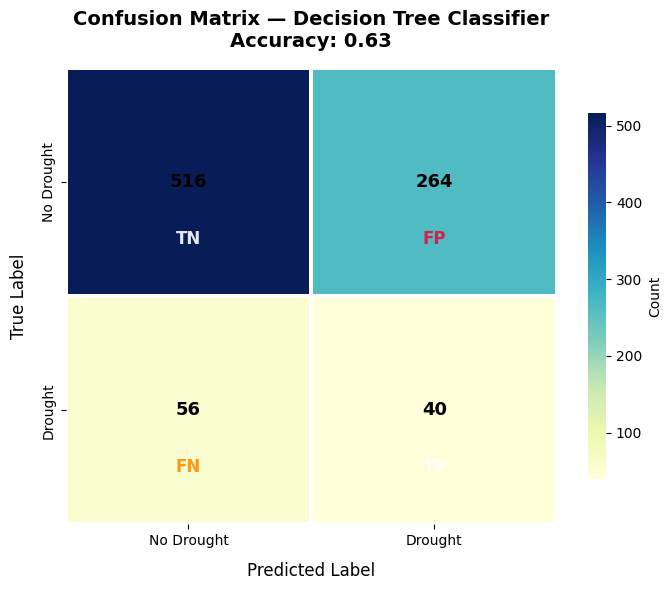

In [62]:
# Generating the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix and accuracy
cm = confusion_matrix(y_test, preds)
acc = accuracy_score(y_test, preds)

# Class labels
labels = ["No Drought", "Drought"]

# Plot setup
plt.figure(figsize=(7,6))
ax = sns.heatmap(cm, annot=True, fmt='d',
                 cmap='YlGnBu',
                 linewidths=1.5, linecolor='white',
                 xticklabels=labels, yticklabels=labels,
                 cbar_kws={'shrink':0.8, 'label':'Count'},
                 annot_kws={'size':13, 'weight':'bold', 'color':'black'})

plt.title(f"Confusion Matrix — Decision Tree Classifier\nAccuracy: {acc:.2f}",
          fontsize=14, weight='bold', pad=15)
plt.xlabel("Predicted Label", fontsize=12, labelpad=10)
plt.ylabel("True Label", fontsize=12, labelpad=10)

# Label coordinates (slightly below numeric counts)
offset_y = 0.25  # small downward shift from center

# Overlay TN / FP / FN / TP *below* the numbers
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == 0 and j == 0:
            label, color = "TN", "white"
        elif i == 0 and j == 1:
            label, color = "FP", "crimson"
        elif i == 1 and j == 0:
            label, color = "FN", "darkorange"
        else:
            label, color = "TP", "white"

        ax.text(j + 0.5, i + 0.5 + offset_y, label,
                color=color, fontsize=12, weight='bold',
                ha='center', va='center', alpha=0.9)

plt.tight_layout()
plt.show()

In [63]:
# Accuracy, F1 Score and Recall Score

accuracy = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds)
recall = recall_score(y_test, preds)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Recall Score: {recall:.2f}')

Accuracy: 0.63
F1 Score: 0.20
Recall Score: 0.42


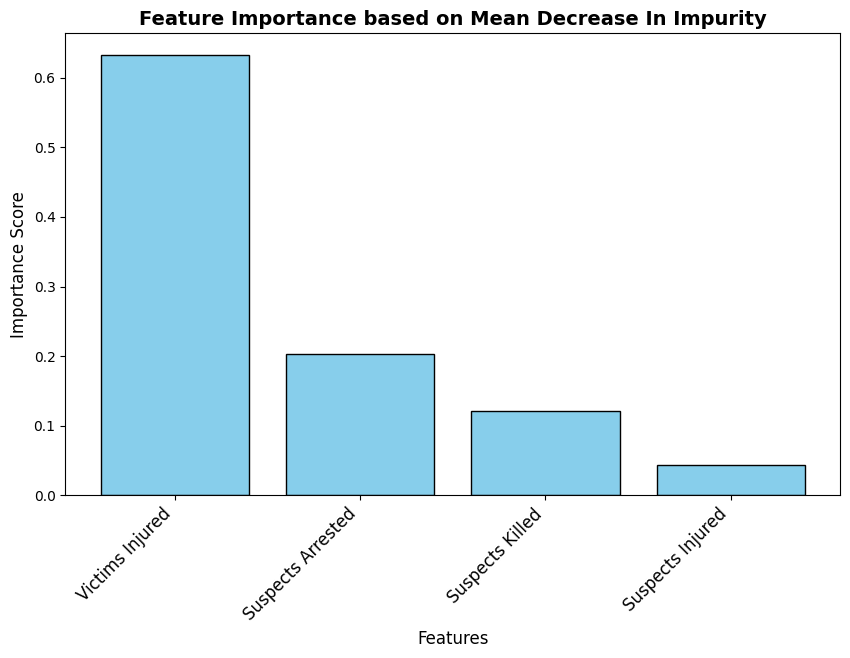

In [64]:
# Visualize Feature Importance

importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance based on Mean Decrease In Impurity", fontsize = 14, weight = 'bold')
plt.bar(range(X_train.shape[1]), importances[indices], align = 'center', color = 'skyblue', edgecolor = 'black')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation = 45, ha = 'right', fontsize = 12)
plt.xlabel("Features", fontsize = 12)
plt.ylabel("Importance Score", fontsize = 12)
plt.show()

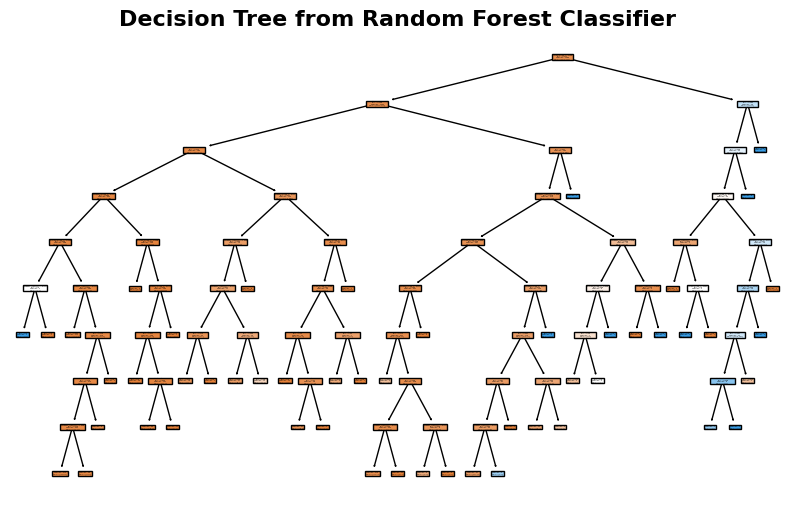

In [65]:
# Visualizing the Decision Tree for a Random Forest Classifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10,6))
plot_tree(classifier.estimators_[0], feature_names = features, filled = True)
plt.title("Decision Tree from Random Forest Classifier", fontsize=16, weight='bold')
plt.show()